In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

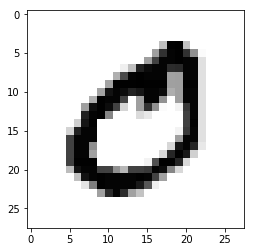

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

test_image = X[1].reshape(28,28)
plt.imshow(test_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.show()

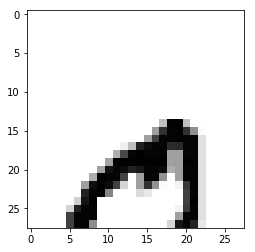

In [5]:
from scipy.ndimage.interpolation import shift

test_image = shift(test_image, [10,0], cval = 0)

plt.imshow(test_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.show()

In [16]:
#training on original data set

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

#model_test = KNeighborsClassifier()
#model_test.fit(X_train, y_train)

#y_test_knn_pred = cross_val_score(model_test, X_test, y_test, cv=3, scoring='accuracy')

#print(y_test_knn_pred)

In [3]:
def shift_image_4_dir(image):
    X = []
    X.append(shift(image, [1,0], cval=0))
    X.append(shift(image, [0,1], cval=0))
    X.append(shift(image, [-1,0], cval=0))
    X.append(shift(image, [0,-1], cval=0))
    return X

In [41]:
X_testt = shift_image_4_dir(test_image)

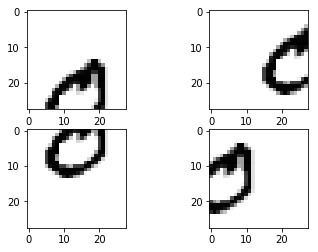

In [42]:
fig = plt.figure()
idx=0

for i in X_testt:
    ax = fig.add_subplot(2, 2, idx+1)
    ax.imshow(i, cmap=matplotlib.cm.binary, interpolation = 'nearest')
    idx+=1

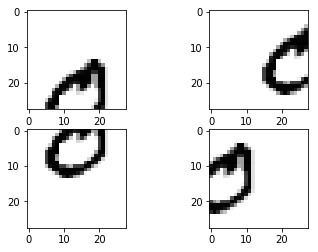

In [48]:
test_image = X[1].reshape(28,28)
X_testt = shift_image_4_dir(test_image)
fig = plt.figure()
idx=0

for i in X_testt:
    ax = fig.add_subplot(2, 2, idx+1)
    ax.imshow(i, cmap=matplotlib.cm.binary, interpolation = 'nearest')
    idx+=1

In [6]:
X_train_new = []
for i in X_train:
    X_new_images=shift_image_4_dir(i.reshape(28,28))
    for z in X_new_images:
        X_train_new.append(z)

In [7]:
X_train_new = np.array(X_train_new)

In [8]:
X_train_new_shape = []
for i in range(0, len(X_train_new)):
    X_train_new_shape.append(X_train_new[i].reshape(784,))

In [9]:
X_train_new_shape = np.array(X_train_new_shape)

In [10]:
X_train_concat = np.concatenate((X_train, X_train_new_shape), axis=0)
len(X_train_concat)

300000

In [11]:
y_train_add = []

for i in y_train:
    for z in range(0,4):
        y_train_add.append(i)

In [12]:
y_train_concat = np.concatenate((y_train, y_train_add), axis=0)
len(y_train_concat)

300000

In [14]:
shuffle_index = np.random.permutation(len(y_train_concat))
X_train_art, y_train_art = X_train_concat[shuffle_index], y_train_concat[shuffle_index]

In [17]:
model_test = KNeighborsClassifier()
model_test.fit(X_train_art, y_train_art)

#y_test_knn_pred = cross_val_score(model_test, X_test, y_test, cv=3, scoring='accuracy')

#print(y_test_knn_pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
from sklearn.metrics import accuracy_score

y_pred = model_test.predict(X_test)
accuracy_score(y_test, y_pred)

0.97540000000000004

In [19]:
model_test_orig = KNeighborsClassifier()
model_test_orig.fit(X_train, y_train)

y_pred_orig = model_test_orig.predict(X_test)
accuracy_score(y_test, y_pred_orig)

0.96879999999999999